In [1]:
source('model_utils.R')
source('heritability_utils.R')
source('snp_utils.R')
DATA.FOLDER <- "/scratch/PI/mrivas/users/erflynn/sex_div_gwas/data/"

Loading required package: MASS
Loading required package: Matrix
Loading required package: mnormt
Loading required package: qqman

For example usage please run: vignette('qqman')

Citation appreciated but not required:
Turner, S.D. qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. biorXiv DOI: 10.1101/005165 (2014).

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.17.3, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


In [2]:
trait <- 'whr'
load(file=sprintf("%s/m2/dat_%s.RData", DATA.FOLDER, trait))
load(file=sprintf("%s/m2/f_m2_%s.RData", DATA.FOLDER, trait))

In [3]:
trait.type <- 'quant'
maf.cutoff <- 0.01 
se.cutoff <- 0.2
chrs <- c(1:22)
    

In [4]:
all.dat <- lapply(chrs, function(x){ getDataQuant(as.character(x), trait)})

    # reformat data, remove rows that are not shared
    dat.reform <- reformatData(all.dat, trait.type, maf.cutoff)
    filt.f <- dat.reform$`1`
    filt.m <- dat.reform$`2`

    # filter by standard error
    dat.filt <- filterSE(filt.f, filt.m, trait.type, cutoff=se.cutoff)
    filt.f <- dat.filt$`1`
    filt.m <- dat.filt$`2`

In [5]:
filt.f$CHR <- sapply(filt.f$CHR, as.numeric)
filt.m$CHR <- sapply(filt.m$CHR, as.numeric)

f.snps <- read.table(sprintf("%s/m2_v4/f_spec_snp_tab_%s.txt", DATA.FOLDER, trait), header=TRUE)

In [26]:
f.snps2 <- f.snps[f.snps$p_f < (5*(10**-8)),]
my.chr <- unique(f.snps2$CHR)

In [28]:
head(filt.f)

,CHR,BP,SNP,REF,ALT1,TEST,OBS_CT,BETA,SE,T_STAT,P
10,1,768448,rs12562034,G,A,ADD,180410,-0.00157184,0.00535130,0.293730,0.768964
12,1,779322,rs4040617,A,G,ADD,180229,0.00409998,0.00491052,-0.834939,0.403753
13,1,801536,rs79373928,T,G,ADD,180614,-0.00870708,0.01361710,0.639420,0.522550
21,1,838555,rs4970383,C,A,ADD,180361,-0.00381964,0.00381039,1.002430,0.316139
24,1,849998,rs13303222,A,G,ADD,180417,-0.00349157,0.00428010,0.815769,0.414634
26,1,851390,rs72631889,G,T,ADD,180363,-0.01186050,0.00818110,1.449750,0.147131


png 
  2

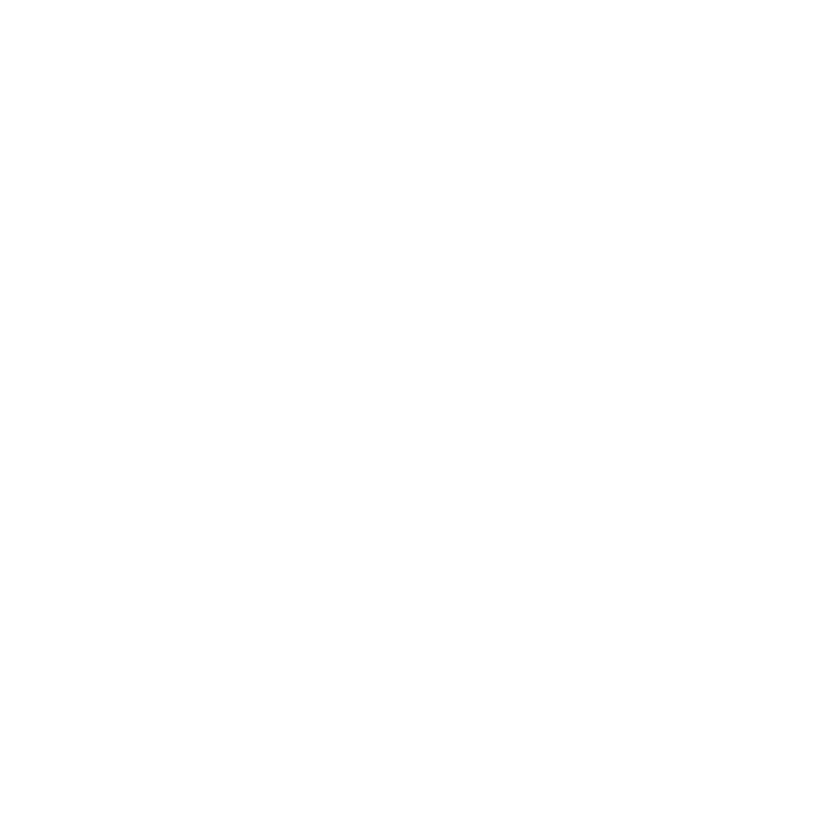

In [34]:
plot.new() 
pdf( "whr_f.pdf")
manhattan(filt.f[filt.f$CHR %in% my.chr,], highlight=f.snps2$SNP, ylim=c(0, 30))
dev.off()

In [ ]:
manhattan(filt.f, highlight=f.snps2, ylim=c(0, 30))
manhattan(filt.m, highlight=f.snps2, ylim=c(0, 30))


png 
  2

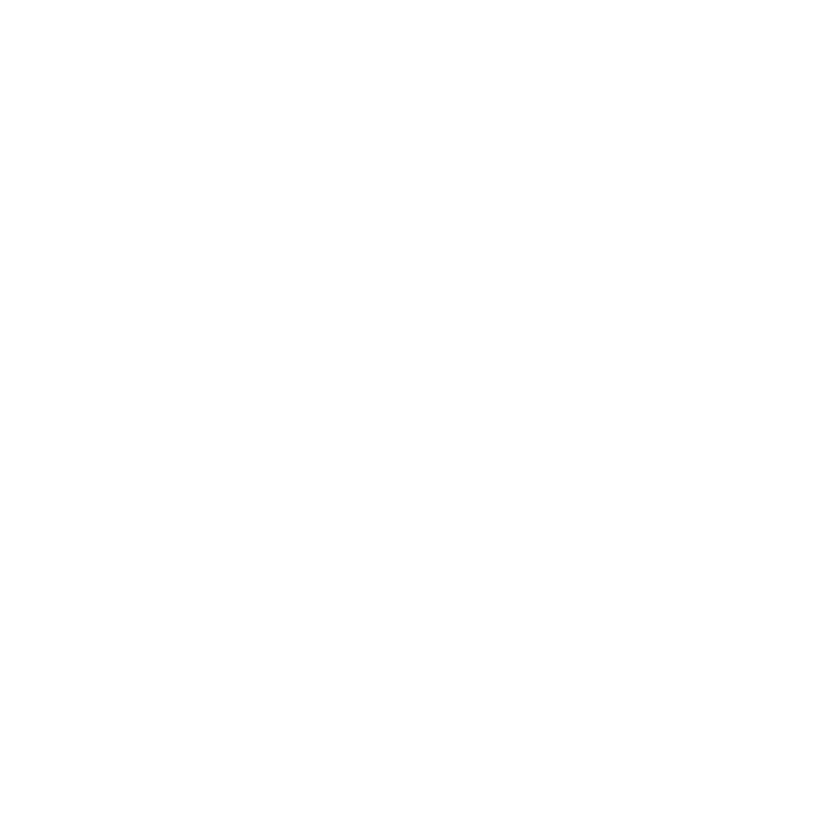

In [33]:
plot.new()
pdf("whr_m.pdf")
manhattan(filt.m[filt.f$CHR %in% my.chr,], highlight=f.snps2$SNP, ylim=c(0,30))
dev.off()